# 1) Solving the travelling salesman problem (TSP) for 7 cities

### Number of cities

In [128]:
n = 7

n =  7


### Distance between cities

In [129]:
function d = distanceMatrixCities(n)

    d = 100*rand(n);

    ## Fill diagonal with zeros
    i = 1;
    
    while(i<=n)
        d(i,i) = 0;
        i++;
    end
    
end

d = distanceMatrixCities(n)

d =

    0.00000   15.85686   25.86566   10.08392   98.34129   40.17706   45.38406
   42.57933    0.00000   45.42947   95.80212   65.69155   91.59857   61.05135
   74.96137   97.32090    0.00000   41.84150   95.61133   25.98841   55.57334
   78.15795   48.13528   49.70604    0.00000   66.98204   94.02475   60.68747
   55.98854   99.01573   90.45029   23.89301    0.00000   37.43179   10.02293
   17.41466   25.31213   31.37327   93.62141   70.21436    0.00000   16.24010
   45.73254    7.66611   19.33004   31.46755   28.16000   76.04339    0.00000



## a) Initial population

### Population

In [130]:
pop = perms([1:n]);

In [131]:
size(pop)(1)

ans =  5040


In [132]:
totalPop = pop;

### Size of the initial generation

In [133]:
sizeSubPop = 10 

sizeSubPop =  10


### Select individuals randomly from the population ("generation 0")

In [134]:
function subPop = createSubPopulation(totalPop,sizeSubPop)

    subPop = totalPop(randi(size(totalPop)(1),sizeSubPop,1),:);

end

generation0 = createSubPopulation(totalPop,sizeSubPop)


generation0 =

   6   4   1   3   5   2   7
   1   2   5   7   4   3   6
   3   1   5   7   2   4   6
   6   4   5   2   7   1   3
   7   1   2   6   3   4   5
   4   2   7   3   6   1   5
   3   1   5   2   7   6   4
   5   6   4   3   2   1   7
   7   1   2   4   6   3   5
   4   3   5   6   7   1   2



## b) Fitness calculation

### Total travel distance for each possible sequence of cities

In [135]:
function individuals = distanceCalculation(pop,d)
    
    daccs = zeros([size(pop)(1),size(pop)(2)+1]);

        for i = 1:(size(pop)(1))
            dacc = 0;

            for j = 1:(size(pop)(2)-1)
                dacc += d(pop(i,j),pop(i,j+1));
            end

            daccs(i,:) = [pop(i,:),dacc];
            
        end
    
    individuals{1} = pop;
    individuals{2} = daccs(:,size(daccs)(2));

end



In [136]:
## The first position of the array has the sequence of cities and the second position the total distance between cities
generation0 = distanceCalculation(pop = generation0,d = d)

generation0 =
{
  [1,1] =

     6   4   1   3   5   2   7
     1   2   5   7   4   3   6
     3   1   5   7   2   4   6
     6   4   5   2   7   1   3
     7   1   2   6   3   4   5
     4   2   7   3   6   1   5
     3   1   5   2   7   6   4
     5   6   4   3   2   1   7
     7   1   2   4   6   3   5
     4   3   5   6   7   1   2

  [1,2] =

     453.32
     198.73
     380.82
     392.27
     293.38
     270.26
     503.03
     366.04
     378.40
     260.58

}



### Fitness function

In [137]:
function individuals = fitness(individuals)

    individuals{3} = individuals{2};

    for i=1:size(individuals{1})(1)

        individuals{3}(i,1) = 1/individuals{2}(i);

    end 

end

In [138]:
#The third position of the array includes the fitness of each individual
generation0 = fitness(generation0)

generation0 =
{
  [1,1] =

     6   4   1   3   5   2   7
     1   2   5   7   4   3   6
     3   1   5   7   2   4   6
     6   4   5   2   7   1   3
     7   1   2   6   3   4   5
     4   2   7   3   6   1   5
     3   1   5   2   7   6   4
     5   6   4   3   2   1   7
     7   1   2   4   6   3   5
     4   3   5   6   7   1   2

  [1,2] =

     453.32
     198.73
     380.82
     392.27
     293.38
     270.26
     503.03
     366.04
     378.40
     260.58

  [1,3] =

     0.0022059
     0.0050319
     0.0026259
     0.0025493
     0.0034085
     0.0037001
     0.0019879
     0.0027319
     0.0026427
     0.0038376

}



In [139]:
generation0

generation0 =
{
  [1,1] =

     6   4   1   3   5   2   7
     1   2   5   7   4   3   6
     3   1   5   7   2   4   6
     6   4   5   2   7   1   3
     7   1   2   6   3   4   5
     4   2   7   3   6   1   5
     3   1   5   2   7   6   4
     5   6   4   3   2   1   7
     7   1   2   4   6   3   5
     4   3   5   6   7   1   2

  [1,2] =

     453.32
     198.73
     380.82
     392.27
     293.38
     270.26
     503.03
     366.04
     378.40
     260.58

  [1,3] =

     0.0022059
     0.0050319
     0.0026259
     0.0025493
     0.0034085
     0.0037001
     0.0019879
     0.0027319
     0.0026427
     0.0038376

}



## c) Choosing parents to create the next generation of individuals

In [12]:
function [individuals,parents] = chooseParents(individuals)

    individuals{4} = individuals{3};

    individualsCopy = individuals;

    #probParent = individuals{3}/sum(individuals{3})

    #First best-fitted individual

    [maxVal1,maxIndex1] = max(individuals{3});

    #Second best-fitted individual
    individualsCopy{3}(maxIndex1) = -1*individualsCopy{3}(maxIndex1);
    [maxVal2,maxIndex2] = max(individualsCopy{3});

    #Create a column with binary variables that takes the value 1 if the individual is parent or zero, otherwise. 
    individuals{4}=zeros(size(individuals{1})(1),1);

    individuals{4}(maxIndex1) = 1;
    individuals{4}(maxIndex2) = 1;

end

In [13]:
#The fourth position of the array shows which individuals were selected as parents
chooseParents(generation0)

ans =
{
  [1,1] =

     5   6   7   2   4   3   1
     3   1   2   4   6   5   7
     4   2   1   5   7   3   6
     5   2   7   4   6   1   3
     5   2   3   7   6   4   1
     7   2   3   5   1   6   4
     6   5   2   1   7   4   3
     6   1   5   3   4   2   7
     5   3   7   1   2   6   4
     7   3   1   6   2   4   5

  [1,2] =

     325.56
     329.47
     279.29
     205.84
     240.55
     310.28
     323.49
     200.46
     293.40
     418.42

  [1,3] =

     0.0030716
     0.0030352
     0.0035805
     0.0048582
     0.0041571
     0.0032229
     0.0030913
     0.0049884
     0.0034083
     0.0023900

  [1,4] =

     0
     0
     0
     1
     0
     0
     0
     1
     0
     0

}



In [14]:
function parents = createParents(individuals)

individuals = chooseParents(individuals);

parents = {:};

count = 1;

for i = 1:size(individuals{4})(1)

    if individuals{4}(i) == 1

    parents{1}(count,:) = individuals{1}(i,:);
    parents{2}(count,:) = individuals{2}(i,:);
    parents{3}(count,:) = individuals{3}(i,:);
    
    count++;

    end

end


end

In [15]:
#This array includes information on the parents selected from generation 0 (1: sequence of cities, 2: total distance, 3: fitness)
parentsG0 = createParents(generation0)

parentsG0 =
{
  [1,1] =

     5   2   7   4   6   1   3
     6   1   5   3   4   2   7

  [1,2] =

     205.84
     200.46

  [1,3] =

     0.0048582
     0.0049884

}



## d) Crossover

### Check if a gene (city) exist in a chromosome (sequence of cities)

In [16]:
function geneExist = containGene(child,gene)

    geneExist = false;

    for i=1:length(child)

        if child(i) == gene

            geneExist = true;

        end

    end

end

### Crossover between the two parents

In [17]:
function child = crossoverCertamen(parents)    
    #Comentario 1
    nParents = size(parents{1})(1);    
    #Comentario 2
    chromosomeSize = size(parents{1})(2);
    #Comentario 3
    indexCO = randi([2,chromosomeSize],1,1);  
    #Comentario 4
    parentCO = randi(nParents,1,1);
    chromosomeParent1 = parents{1}(parentCO,:);
    chromosomeParent2 = parents{1}(1,:);
    if parentCO == 1
        chromosomeParent2 = parents{1}(2,:);
    end   
    #Comentario 5
    child = chromosomeParent1;

    for i=1:length(child)
        if i < indexCO
            child(i) = 0;
        end
    end
    #Comentario 6
    genePosition = 1;
    for i=1:(indexCO-1)      
        child(i) = chromosomeParent2(genePosition);
        genePosition++;
    end   
end

In [18]:
function child = crossover(parents)


    nParents = size(parents{1})(1);
    chromosomeSize = size(parents{1})(2);

    %Select a random crossover point
    indexCO = randi([2,chromosomeSize],1,1);

    %Select the parent (parentChromosome1) that is used to start the crossover
    parentCO = randi(nParents,1,1);
    chromosomeParent1 = parents{1}(parentCO,:);
    chromosomeParent2 = parents{1}(1,:);

    if parentCO == 1
        chromosomeParent2 = parents{1}(2,:);
    end

    child = chromosomeParent1;

    #Genes from parent 1
    for i=1:length(child)

        if i < indexCO
            child(i) = 0;
        end

    end

    #Genes from parent 2
    genePosition = 1;
    for i=1:(indexCO-1)

        implant = false;

        while implant == false 
            geneExist = containGene(child,chromosomeParent2(genePosition));

            if geneExist == true
                genePosition++;
                implant = false;

            else
                child(i) = chromosomeParent2(genePosition);
                implant = true;
                genePosition++;
            end

        end

    end
    
end

In [19]:
childG0 = crossover(parentsG0)

childG0 =

   6   1   5   3   4   2   7



## e) Mutation

In [20]:
function child = mutation(child, pm)
    
    childCopy = child;
    chromosomeSize = length(child);

    indexM1 = randi([1,chromosomeSize],1,1);
    indexM2 = randi([1,chromosomeSize],1,1);
    
    probThreshold = rand(1);
    
    if probThreshold <= pm
    
        childCopy(indexM1) = child(indexM2);
        childCopy(indexM2) = child(indexM1);
        
    end
    
    child = childCopy;

end

In [21]:
childG0
childG0 = mutation(childG0, pm = 0.5) # Mutation with a 50% probability

childG0 =

   6   1   5   3   4   2   7

childG0 =

   6   1   5   3   4   2   7



## f) Next Generation  (replacement)

### Size of the next generation 

In [22]:
sizeGeneration = 1*size(generation0{1})(1)

sizeGeneration =  10


### Check if the child exists in a generation

In [23]:
function childExist = containChild(child,children)
    
    childExist = false;
    
    for i=1:size(children)(1)
    
        counterEqualGenes = 0;
        
        for j= 1:length(children(i,:))
        
            if children(i,:)(j) == child(j)
                counterEqualGenes++;
            end
     
        end
        
        if counterEqualGenes == length(child)
            childExist = true;
        end


    end

end

### Function to create the next generations of individuals

In [24]:
function generations = createNewGeneration(nGenerations,sizeGeneration,individuals,d,pm)
    
    
    #This process is iteratively repeated for each generation
    generations = {:};
    
    t=cputime;
    
    for i=1:nGenerations      
        
        
        
        individuals = distanceCalculation(individuals{1},d);

        individuals = fitness(individuals);

        parents = createParents(individuals);

        child = crossover(parents);

        child = mutation(child,pm);
        
        if i == 1
            
            #Information about the new generation
            individuals(4) = min(individuals{2});
            individuals{5} = cputime-t;
            generations{i} = individuals;
            
        end
               
        if i > 1
        
            #This process is repeated until reaching the number of individuals in a generation
            newGeneration = {:};
        
            %newGeneration{2} = zeros(sizeGeneration,length(child));

            newGeneration{1}(1,:) = child;

            for j=1:sizeGeneration

                 newChild = mutation(crossover(parents),pm);

                 #Children are all different
                 while(containChild(child = newChild, children = newGeneration{1}))

                     newChild = mutation(crossover(parents),pm);

                 end

                 newGeneration{1}(j,:) = newChild;

            end

            #Information about the new generation
            individuals  = distanceCalculation(newGeneration{1},d);
            individuals = fitness(individuals);
            individuals(4) = min(individuals{2});
            individuals{5} = cputime-t;
            generations{i} = individuals;
        
        end
        

        


        
    end

end

# 2) Analyses

## Initial generation

In [25]:
createNewGeneration(nGenerations = 1, sizeGeneration = sizeGeneration,individuals = generation0, d = d, pm = 0.2)

ans =
{
  [1,1] =
  {
    [1,1] =

       5   6   7   2   4   3   1
       3   1   2   4   6   5   7
       4   2   1   5   7   3   6
       5   2   7   4   6   1   3
       5   2   3   7   6   4   1
       7   2   3   5   1   6   4
       6   5   2   1   7   4   3
       6   1   5   3   4   2   7
       5   3   7   1   2   6   4
       7   3   1   6   2   4   5

    [1,2] =

       325.56
       329.47
       279.29
       205.84
       240.55
       310.28
       323.49
       200.46
       293.40
       418.42

    [1,3] =

       0.0030716
       0.0030352
       0.0035805
       0.0048582
       0.0041571
       0.0032229
       0.0030913
       0.0049884
       0.0034083
       0.0023900

    [1,4] =  200.46
    [1,5] =  0.0073730
  }

}



## First generation

In [26]:
generation01 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = generation0, d = d, pm = 0.2);

In [27]:
generation01{2}

ans =
{
  [1,1] =

     5   6   1   3   4   2   7
     5   2   4   7   6   1   3
     6   1   5   4   2   7   3
     5   2   7   4   6   1   3
     5   2   4   6   1   3   7
     6   5   4   2   7   1   3
     6   1   5   3   4   2   7
     5   4   2   7   6   1   3
     6   2   7   4   5   1   3
     6   1   7   3   4   2   5

  [1,2] =

     199.02
     222.34
     195.32
     205.84
     173.44
     232.25
     200.46
     170.81
     269.47
     324.53

  [1,3] =

     0.0050246
     0.0044977
     0.0051199
     0.0048582
     0.0057656
     0.0043057
     0.0049884
     0.0058545
     0.0037109
     0.0030814

  [1,4] =  170.81
  [1,5] =  0.067224
}



## Second generation

In [28]:
generation12 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = generation01{2}, d = d, pm = 0.8);

In [29]:
generation12{2}

ans =
{
  [1,1] =

     5   2   4   7   6   1   3
     5   2   4   6   1   3   7
     5   2   4   6   3   1   7
     5   7   4   6   2   1   3
     3   2   4   6   1   5   7
     5   1   4   7   6   2   3
     5   4   2   6   1   7   3
     2   5   4   6   1   7   3
     3   2   4   7   6   1   5
     2   4   5   6   1   3   7

  [1,2] =

     222.34
     173.44
     286.79
     226.44
     231.48
     268.22
     243.00
     264.78
     241.59
     218.90

  [1,3] =

     0.0044977
     0.0057656
     0.0034868
     0.0044161
     0.0043201
     0.0037283
     0.0041152
     0.0037767
     0.0041393
     0.0045683

  [1,4] =  173.44
  [1,5] =  0.084966
}



## 4 generations (generation 0, 1, 2 and 3)

In [89]:
generations1234 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = generation0, d = d, pm = 0.8);
generations1234

error: matrix cannot be indexed with {
error: called from
    createNewGeneration at line 13 column 21
generations1234 =
{
  [1,1] =
  {
    [1,1] =

       5   6   7   2   4   3   1
       3   1   2   4   6   5   7
       4   2   1   5   7   3   6
       5   2   7   4   6   1   3
       5   2   3   7   6   4   1
       7   2   3   5   1   6   4
       6   5   2   1   7   4   3
       6   1   5   3   4   2   7
       5   3   7   1   2   6   4
       7   3   1   6   2   4   5

    [1,2] =

       325.56
       329.47
       279.29
       205.84
       240.55
       310.28
       323.49
       200.46
       293.40
       418.42

    [1,3] =

       0.0030716
       0.0030352
       0.0035805
       0.0048582
       0.0041571
       0.0032229
       0.0030913
       0.0049884
       0.0034083
       0.0023900

    [1,4] =  200.46
    [1,5] =  0.0095070
  }

  [1,2] =
  {
    [1,1] =

       6   1   5   2   4   7   3
       5   2   6   4   1   3   7
       6   5   4   2   3   1   7
       

# 3) Plots

## Computational time and number of cities using bruteforce

### Auxiliary functions

In [116]:
function daccs = distanceCalculation2(cities,d)

    daccs = zeros([size(cities)(1),size(cities)(2)+1]);

    for i = 1:(size(cities)(1))
        dacc = 0;
        
        for j = 1:(size(cities)(2)-1)
            dacc += d(cities(i,j),cities(i,j+1));
        end
        
        daccs(i,:) = [cities(i,:),dacc];
    
    end
end

In [119]:
function minS = minimumTotalDistance2(daccs,nCities)

    minD = min(daccs(:,nCities+1));
    minS = 1;

    for i = 1:size(daccs)(1)
        if(daccs(i,size(daccs)(2))==minD)
            minS = i;
        end
    end

end

function [n,minSeq,minDist,cpuTime] = TSP(nCities)

    n = nCities;
    d = distanceMatrixCities(n);
    t=cputime;

    p = perms([1:n]);

    daccs = distanceCalculation2(cities = p, d = d);

    minS = minimumTotalDistance2(daccs,nCities = nCities);

    minSeq = daccs(minS,1:(size(daccs)(2)-1));
    minDist = daccs(minS,size(daccs)(2));
    cpuTime = cputime-t;


end


### Plot

In [120]:
function CPUTimeAndCities = plotNCitiesCPUTime(minNCities,maxNCities)

    CPUTimeAndCities = zeros(maxNCities-minNCities+1,2);

    count = 1;
        
    for i = minNCities:maxNCities;

        [nCities,minSeq,minDist,cpuTime] = TSP(nCities = i);
        CPUTimeAndCities(count,1) = nCities;
        CPUTimeAndCities(count,2) = cpuTime;
        count++;

    end

end

CPUTimeAndCities28 =

    2.0000000    0.0016030
    3.0000000    0.0016810
    4.0000000    0.0066910
    5.0000000    0.0322510
    6.0000000    0.2423840
    7.0000000    1.3429770
    8.0000000   12.1867600



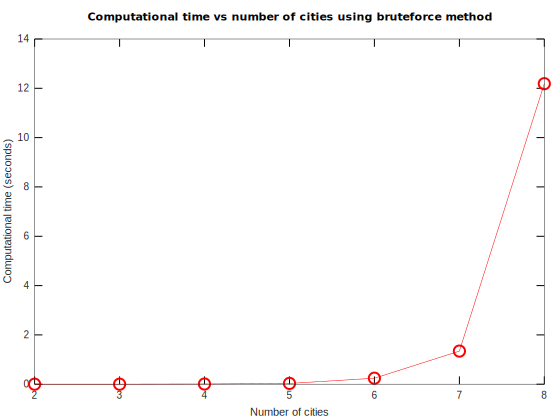

In [153]:
CPUTimeAndCities28 = plotNCitiesCPUTime(minNCities=2,maxNCities=8)

In [ ]:
plot([CPUTimeAndCities28(:,1)], [CPUTimeAndCities28(:,2)], 'o-r');
title ("Computational time vs number of cities using bruteforce method");
xlabel ("Number of cities");
ylabel ("Computational time (seconds)");

## Computational time and number of cities using genetic algorithm (TBC)

## Computational time and optimality using genetic algorithm

### Optimal value

In [154]:
function [opt,t]=OptimalDistanceCalculation(pop,d)

    t=cputime;

    opt = min(distanceCalculation(pop,d){2});

    t = cputime-t;

end

In [155]:
[optimalDistance, cputime] = OptimalDistanceCalculation(pop = totalPop, d = d)

optimalDistance =  116.61
cputime =  1.4617


### Plot

In [156]:
function OptimalityAndGenerations = tableOptimalityAndNGenerations(minNGenerations,maxNGenerations, sizeGeneration,individuals,d,pm)

    newGenerations = createNewGeneration(nGenerations = maxNGenerations, sizeGeneration = sizeGeneration,individuals = individuals, d = d, pm = pm);

    OptimalityAndGenerations = zeros(maxNGenerations-minNGenerations+1,2);

    count = 1;
    
    for i = minNGenerations:maxNGenerations;

        OptimalityAndGenerations(count,1) = i;
        OptimalityAndGenerations(count,2) = newGenerations{i}{4};
        count++;

    end

end

In [158]:
OptimalityAndGenerations18 = tableOptimalityAndNGenerations(minNGenerations = 1,maxNGenerations = 8, sizeGeneration = 15,individuals = generation0, d = d, pm = 0.5)

OptimalityAndGenerations18 =

     1.0000   198.7333
     2.0000   150.4564
     3.0000   146.0467
     4.0000   146.0467
     5.0000   146.0467
     6.0000   146.0467
     7.0000   116.6055
     8.0000   116.6055



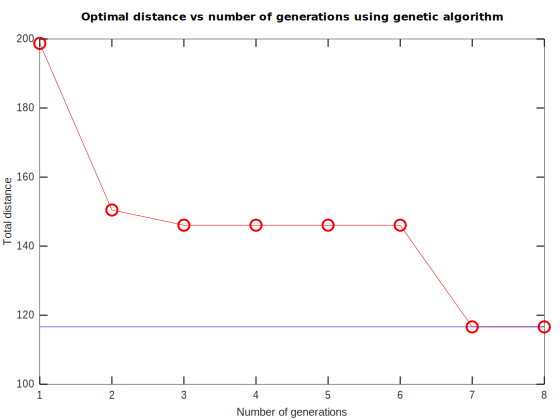

In [160]:
plot([OptimalityAndGenerations18(:,1)], [OptimalityAndGenerations18(:,2)], 'o-r');
title ("Optimal distance vs number of generations using genetic algorithm");
xlabel ("Number of generations");
ylabel ("Optimal distance [m]");
hold on;
plot([min(OptimalityAndGenerations18(:,1)),max(OptimalityAndGenerations18(:,1))],[optimalDistance,optimalDistance], 'b')
hold off;

## Computational time and number of generations using genetic algorithm

### Plot

In [161]:
function CPUTimeAndGenerations = tableCPUTimeAndNGenerations(minNGenerations,maxNGenerations, sizeGeneration,individuals,d,pm)
    
    newGenerations = createNewGeneration(nGenerations = maxNGenerations, sizeGeneration = sizeGeneration,individuals = individuals, d = d, pm = pm);
    
    CPUTimeAndGenerations = zeros(maxNGenerations-minNGenerations+1,2);

    count = 1;
    
    for i = minNGenerations:maxNGenerations;

        CPUTimeAndGenerations(count,1) = i;
        CPUTimeAndGenerations(count,2) = newGenerations{i}{5};
        count++;

    end

end

In [162]:
CPUTimeAndGenerations18 = tableCPUTimeAndNGenerations(minNGenerations = 1,maxNGenerations = 8, sizeGeneration = 15,individuals = generation0, d = d, pm = 0.5)

CPUTimeAndGenerations18 =

   1.000000   0.011117
   2.000000   0.143500
   3.000000   0.332610
   4.000000   0.492675
   5.000000   0.659026
   6.000000   0.900298
   7.000000   1.023747
   8.000000   1.160924



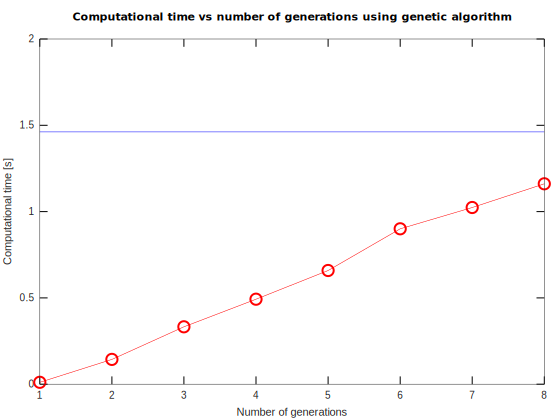

In [164]:
plot([CPUTimeAndGenerations18(:,1)], [CPUTimeAndGenerations18(:,2)], 'o-r');
title ("Computational time vs number of generations using genetic algorithm");
xlabel ("Number of generations");
ylabel ("Computational time [s]");
hold on;
plot([min(CPUTimeAndGenerations18(:,1)),max(CPUTimeAndGenerations18(:,1))],[cputime,cputime], 'b')
axis([min(CPUTimeAndGenerations18(:,1)) max(CPUTimeAndGenerations18(:,1)) 0 2])
hold off;

## Computational time and individuals per generation using genetic algorithm

In [165]:
function CPUTimeAndNIndividuals = tableCPUTimeAndNIndividuals(minSizeGeneration,maxSizeGeneration, nGenerations,totalPop,d,pm)

    CPUTimeAndGNIndividuals = zeros(maxSizeGeneration-minSizeGeneration+1,3);

    count = 1;
    
    for i = minSizeGeneration:maxSizeGeneration;
        
        t=cputime;        
        generation0 = createSubPopulation(totalPop,i);
        generation0 = distanceCalculation(pop = generation0,d = d);
        generation0 = fitness(generation0);
        newGenerations = createNewGeneration(nGenerations = nGenerations, sizeGeneration = i,individuals = generation0, d = d, pm = pm);
        t = cputime-t;
        
        CPUTimeAndNIndividuals(count,1) = i;
        CPUTimeAndNIndividuals(count,2) = newGenerations{nGenerations}{4};
        CPUTimeAndNIndividuals(count,3) = t;
        
        count++;

    end

end

In [166]:
tableCPUTimeAndNIndividuals5To30 = tableCPUTimeAndNIndividuals(minSizeGeneration = 5,maxSizeGeneration = 30, nGenerations = 4,totalPop = totalPop,d,pm)

tableCPUTimeAndNIndividuals5To30 =

     5.00000   220.19128     0.10980
     6.00000   178.45829     0.14628
     7.00000   179.25213     0.17757
     8.00000   198.18988     0.16772
     9.00000   163.70729     0.19440
    10.00000   116.60551     0.24660
    11.00000   215.03456     0.22107
    12.00000   155.59495     0.31495
    13.00000   187.99407     0.27735
    14.00000   198.85689     0.33616
    15.00000   166.07300     0.35047
    16.00000   190.27269     0.65838
    17.00000   182.70178     0.40010
    18.00000   133.31677     0.90279
    19.00000   166.17289     0.73051
    20.00000   166.55506     0.53245
    21.00000   170.15754     0.63474
    22.00000   185.07639     0.73517
    23.00000   171.62448     0.82343
    24.00000   157.59913     0.90006
    25.00000   163.70729     1.01958
    26.00000   146.04675     1.08673
    27.00000   186.03780     1.19700
    28.00000   130.97524     1.08136
    29.00000   130.97524     0.91269
    30.00000   138.15807     1.65850



In [167]:
[optimalDistanceNIndividuals, cputimeNIndividuals] = OptimalDistanceCalculation(pop = totalPop, d = d)

optimalDistanceNIndividuals =  116.61
cputimeNIndividuals =  1.4675


#### Plot individuals per generation and computational time

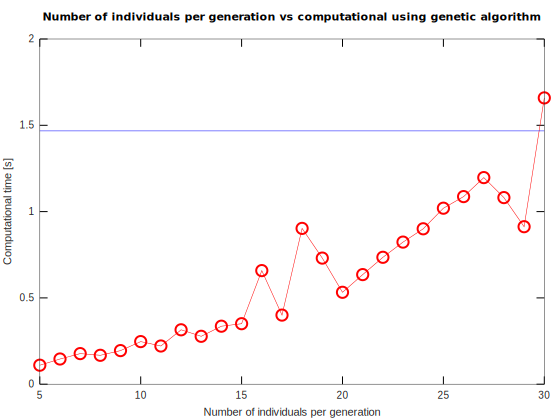

In [172]:
plot([tableCPUTimeAndNIndividuals5To30(:,1)], [tableCPUTimeAndNIndividuals5To30(:,3)], 'o-r');
title ("Number of individuals per generation vs computational using genetic algorithm");
xlabel ("Number of individuals per generation");
ylabel ("Computational time [s]");
hold on;
plot([min(tableCPUTimeAndNIndividuals5To30(:,1)),max(tableCPUTimeAndNIndividuals5To30(:,1))],[cputimeNIndividuals,cputimeNIndividuals], 'b')
hold off;

#### Plot individuals per generation and optimality

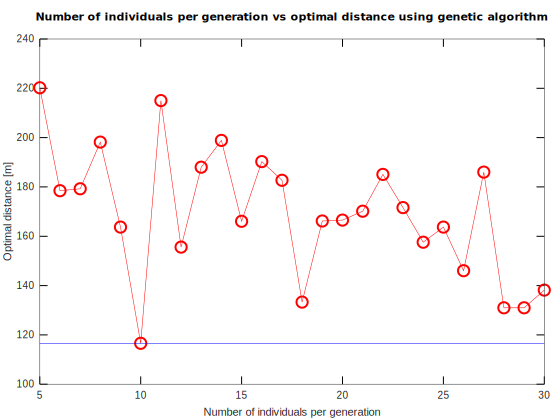

In [173]:
plot([tableCPUTimeAndNIndividuals5To30(:,1)], [tableCPUTimeAndNIndividuals5To30(:,2)], 'o-r');
title ("Number of individuals per generation vs optimal distance using genetic algorithm");
xlabel ("Number of individuals per generation");
ylabel ("Optimal distance [m]");
hold on;
plot([min(tableCPUTimeAndNIndividuals5To30(:,1)),max(tableCPUTimeAndNIndividuals5To30(:,1))],[optimalDistanceNIndividuals,optimalDistanceNIndividuals], 'b')
hold off;

In [71]:
minSizeGeneration = 10

minSizeGeneration =  10


In [72]:
maxSizeGeneration = 20

maxSizeGeneration =  20


In [73]:
nGenerations = 3

nGenerations =  3


In [74]:
totalPop = totalPop

totalPop =

   7   6   5   4   3   2   1
   7   6   5   4   3   1   2
   7   6   5   4   2   3   1
   7   6   5   4   2   1   3
   7   6   5   4   1   3   2
   7   6   5   4   1   2   3
   7   6   5   3   4   2   1
   7   6   5   3   4   1   2
   7   6   5   3   2   4   1
   7   6   5   3   2   1   4
   7   6   5   3   1   4   2
   7   6   5   3   1   2   4
   7   6   5   2   4   3   1
   7   6   5   2   4   1   3
   7   6   5   2   3   4   1
   7   6   5   2   3   1   4
   7   6   5   2   1   4   3
   7   6   5   2   1   3   4
   7   6   5   1   4   3   2
   7   6   5   1   4   2   3
   7   6   5   1   3   4   2
   7   6   5   1   3   2   4
   7   6   5   1   2   4   3
   7   6   5   1   2   3   4
   7   6   4   5   3   2   1
   7   6   4   5   3   1   2
   7   6   4   5   2   3   1
   7   6   4   5   2   1   3
   7   6   4   5   1   3   2
   7   6   4   5   1   2   3
   7   6   4   3   5   2   1
   7   6   4   3   5   1   2
   7   6   4   3   2   5   1
   7   6   4   3   2   1   5
  

   7   4   5   1   6   2   3
   7   4   5   1   3   6   2
   7   4   5   1   3   2   6
   7   4   5   1   2   6   3
   7   4   5   1   2   3   6
   7   4   3   6   5   2   1
   7   4   3   6   5   1   2
   7   4   3   6   2   5   1
   7   4   3   6   2   1   5
   7   4   3   6   1   5   2
   7   4   3   6   1   2   5
   7   4   3   5   6   2   1
   7   4   3   5   6   1   2
   7   4   3   5   2   6   1
   7   4   3   5   2   1   6
   7   4   3   5   1   6   2
   7   4   3   5   1   2   6
   7   4   3   2   6   5   1
   7   4   3   2   6   1   5
   7   4   3   2   5   6   1
   7   4   3   2   5   1   6
   7   4   3   2   1   6   5
   7   4   3   2   1   5   6
   7   4   3   1   6   5   2
   7   4   3   1   6   2   5
   7   4   3   1   5   6   2
   7   4   3   1   5   2   6
   7   4   3   1   2   6   5
   7   4   3   1   2   5   6
   7   4   2   6   5   3   1
   7   4   2   6   5   1   3
   7   4   2   6   3   5   1
   7   4   2   6   3   1   5
   7   4   2   6   1   5   3
   7   4   2  

   7   2   3   4   5   6   1
   7   2   3   4   5   1   6
   7   2   3   4   1   6   5
   7   2   3   4   1   5   6
   7   2   3   1   6   5   4
   7   2   3   1   6   4   5
   7   2   3   1   5   6   4
   7   2   3   1   5   4   6
   7   2   3   1   4   6   5
   7   2   3   1   4   5   6
   7   2   1   6   5   4   3
   7   2   1   6   5   3   4
   7   2   1   6   4   5   3
   7   2   1   6   4   3   5
   7   2   1   6   3   5   4
   7   2   1   6   3   4   5
   7   2   1   5   6   4   3
   7   2   1   5   6   3   4
   7   2   1   5   4   6   3
   7   2   1   5   4   3   6
   7   2   1   5   3   6   4
   7   2   1   5   3   4   6
   7   2   1   4   6   5   3
   7   2   1   4   6   3   5
   7   2   1   4   5   6   3
   7   2   1   4   5   3   6
   7   2   1   4   3   6   5
   7   2   1   4   3   5   6
   7   2   1   3   6   5   4
   7   2   1   3   6   4   5
   7   2   1   3   5   6   4
   7   2   1   3   5   4   6
   7   2   1   3   4   6   5
   7   2   1   3   4   5   6
   7   1   6  

   6   5   7   3   2   1   4
   6   5   7   3   1   4   2
   6   5   7   3   1   2   4
   6   5   7   2   4   3   1
   6   5   7   2   4   1   3
   6   5   7   2   3   4   1
   6   5   7   2   3   1   4
   6   5   7   2   1   4   3
   6   5   7   2   1   3   4
   6   5   7   1   4   3   2
   6   5   7   1   4   2   3
   6   5   7   1   3   4   2
   6   5   7   1   3   2   4
   6   5   7   1   2   4   3
   6   5   7   1   2   3   4
   6   5   4   7   3   2   1
   6   5   4   7   3   1   2
   6   5   4   7   2   3   1
   6   5   4   7   2   1   3
   6   5   4   7   1   3   2
   6   5   4   7   1   2   3
   6   5   4   3   7   2   1
   6   5   4   3   7   1   2
   6   5   4   3   2   7   1
   6   5   4   3   2   1   7
   6   5   4   3   1   7   2
   6   5   4   3   1   2   7
   6   5   4   2   7   3   1
   6   5   4   2   7   1   3
   6   5   4   2   3   7   1
   6   5   4   2   3   1   7
   6   5   4   2   1   7   3
   6   5   4   2   1   3   7
   6   5   4   1   7   3   2
   6   5   4  

   6   3   4   7   1   5   2
   6   3   4   7   1   2   5
   6   3   4   5   7   2   1
   6   3   4   5   7   1   2
   6   3   4   5   2   7   1
   6   3   4   5   2   1   7
   6   3   4   5   1   7   2
   6   3   4   5   1   2   7
   6   3   4   2   7   5   1
   6   3   4   2   7   1   5
   6   3   4   2   5   7   1
   6   3   4   2   5   1   7
   6   3   4   2   1   7   5
   6   3   4   2   1   5   7
   6   3   4   1   7   5   2
   6   3   4   1   7   2   5
   6   3   4   1   5   7   2
   6   3   4   1   5   2   7
   6   3   4   1   2   7   5
   6   3   4   1   2   5   7
   6   3   2   7   5   4   1
   6   3   2   7   5   1   4
   6   3   2   7   4   5   1
   6   3   2   7   4   1   5
   6   3   2   7   1   5   4
   6   3   2   7   1   4   5
   6   3   2   5   7   4   1
   6   3   2   5   7   1   4
   6   3   2   5   4   7   1
   6   3   2   5   4   1   7
   6   3   2   5   1   7   4
   6   3   2   5   1   4   7
   6   3   2   4   7   5   1
   6   3   2   4   7   1   5
   6   3   2  

   6   1   3   2   4   5   7
   6   1   2   7   5   4   3
   6   1   2   7   5   3   4
   6   1   2   7   4   5   3
   6   1   2   7   4   3   5
   6   1   2   7   3   5   4
   6   1   2   7   3   4   5
   6   1   2   5   7   4   3
   6   1   2   5   7   3   4
   6   1   2   5   4   7   3
   6   1   2   5   4   3   7
   6   1   2   5   3   7   4
   6   1   2   5   3   4   7
   6   1   2   4   7   5   3
   6   1   2   4   7   3   5
   6   1   2   4   5   7   3
   6   1   2   4   5   3   7
   6   1   2   4   3   7   5
   6   1   2   4   3   5   7
   6   1   2   3   7   5   4
   6   1   2   3   7   4   5
   6   1   2   3   5   7   4
   6   1   2   3   5   4   7
   6   1   2   3   4   7   5
   6   1   2   3   4   5   7
   5   7   6   4   3   2   1
   5   7   6   4   3   1   2
   5   7   6   4   2   3   1
   5   7   6   4   2   1   3
   5   7   6   4   1   3   2
   5   7   6   4   1   2   3
   5   7   6   3   4   2   1
   5   7   6   3   4   1   2
   5   7   6   3   2   4   1
   5   7   6  

   5   4   7   1   6   3   2
   5   4   7   1   6   2   3
   5   4   7   1   3   6   2
   5   4   7   1   3   2   6
   5   4   7   1   2   6   3
   5   4   7   1   2   3   6
   5   4   6   7   3   2   1
   5   4   6   7   3   1   2
   5   4   6   7   2   3   1
   5   4   6   7   2   1   3
   5   4   6   7   1   3   2
   5   4   6   7   1   2   3
   5   4   6   3   7   2   1
   5   4   6   3   7   1   2
   5   4   6   3   2   7   1
   5   4   6   3   2   1   7
   5   4   6   3   1   7   2
   5   4   6   3   1   2   7
   5   4   6   2   7   3   1
   5   4   6   2   7   1   3
   5   4   6   2   3   7   1
   5   4   6   2   3   1   7
   5   4   6   2   1   7   3
   5   4   6   2   1   3   7
   5   4   6   1   7   3   2
   5   4   6   1   7   2   3
   5   4   6   1   3   7   2
   5   4   6   1   3   2   7
   5   4   6   1   2   7   3
   5   4   6   1   2   3   7
   5   4   3   7   6   2   1
   5   4   3   7   6   1   2
   5   4   3   7   2   6   1
   5   4   3   7   2   1   6
   5   4   3  

   5   2   4   3   7   1   6
   5   2   4   3   6   7   1
   5   2   4   3   6   1   7
   5   2   4   3   1   7   6
   5   2   4   3   1   6   7
   5   2   4   1   7   6   3
   5   2   4   1   7   3   6
   5   2   4   1   6   7   3
   5   2   4   1   6   3   7
   5   2   4   1   3   7   6
   5   2   4   1   3   6   7
   5   2   3   7   6   4   1
   5   2   3   7   6   1   4
   5   2   3   7   4   6   1
   5   2   3   7   4   1   6
   5   2   3   7   1   6   4
   5   2   3   7   1   4   6
   5   2   3   6   7   4   1
   5   2   3   6   7   1   4
   5   2   3   6   4   7   1
   5   2   3   6   4   1   7
   5   2   3   6   1   7   4
   5   2   3   6   1   4   7
   5   2   3   4   7   6   1
   5   2   3   4   7   1   6
   5   2   3   4   6   7   1
   5   2   3   4   6   1   7
   5   2   3   4   1   7   6
   5   2   3   4   1   6   7
   5   2   3   1   7   6   4
   5   2   3   1   7   4   6
   5   2   3   1   6   7   4
   5   2   3   1   6   4   7
   5   2   3   1   4   7   6
   5   2   3  

   4   7   1   5   3   6   2
   4   7   1   5   3   2   6
   4   7   1   5   2   6   3
   4   7   1   5   2   3   6
   4   7   1   3   6   5   2
   4   7   1   3   6   2   5
   4   7   1   3   5   6   2
   4   7   1   3   5   2   6
   4   7   1   3   2   6   5
   4   7   1   3   2   5   6
   4   7   1   2   6   5   3
   4   7   1   2   6   3   5
   4   7   1   2   5   6   3
   4   7   1   2   5   3   6
   4   7   1   2   3   6   5
   4   7   1   2   3   5   6
   4   6   7   5   3   2   1
   4   6   7   5   3   1   2
   4   6   7   5   2   3   1
   4   6   7   5   2   1   3
   4   6   7   5   1   3   2
   4   6   7   5   1   2   3
   4   6   7   3   5   2   1
   4   6   7   3   5   1   2
   4   6   7   3   2   5   1
   4   6   7   3   2   1   5
   4   6   7   3   1   5   2
   4   6   7   3   1   2   5
   4   6   7   2   5   3   1
   4   6   7   2   5   1   3
   4   6   7   2   3   5   1
   4   6   7   2   3   1   5
   4   6   7   2   1   5   3
   4   6   7   2   1   3   5
   4   6   7  

   4   3   6   7   2   1   5
   4   3   6   7   1   5   2
   4   3   6   7   1   2   5
   4   3   6   5   7   2   1
   4   3   6   5   7   1   2
   4   3   6   5   2   7   1
   4   3   6   5   2   1   7
   4   3   6   5   1   7   2
   4   3   6   5   1   2   7
   4   3   6   2   7   5   1
   4   3   6   2   7   1   5
   4   3   6   2   5   7   1
   4   3   6   2   5   1   7
   4   3   6   2   1   7   5
   4   3   6   2   1   5   7
   4   3   6   1   7   5   2
   4   3   6   1   7   2   5
   4   3   6   1   5   7   2
   4   3   6   1   5   2   7
   4   3   6   1   2   7   5
   4   3   6   1   2   5   7
   4   3   5   7   6   2   1
   4   3   5   7   6   1   2
   4   3   5   7   2   6   1
   4   3   5   7   2   1   6
   4   3   5   7   1   6   2
   4   3   5   7   1   2   6
   4   3   5   6   7   2   1
   4   3   5   6   7   1   2
   4   3   5   6   2   7   1
   4   3   5   6   2   1   7
   4   3   5   6   1   7   2
   4   3   5   6   1   2   7
   4   3   5   2   7   6   1
   4   3   5  

   4   1   5   2   3   7   6
   4   1   5   2   3   6   7
   4   1   3   7   6   5   2
   4   1   3   7   6   2   5
   4   1   3   7   5   6   2
   4   1   3   7   5   2   6
   4   1   3   7   2   6   5
   4   1   3   7   2   5   6
   4   1   3   6   7   5   2
   4   1   3   6   7   2   5
   4   1   3   6   5   7   2
   4   1   3   6   5   2   7
   4   1   3   6   2   7   5
   4   1   3   6   2   5   7
   4   1   3   5   7   6   2
   4   1   3   5   7   2   6
   4   1   3   5   6   7   2
   4   1   3   5   6   2   7
   4   1   3   5   2   7   6
   4   1   3   5   2   6   7
   4   1   3   2   7   6   5
   4   1   3   2   7   5   6
   4   1   3   2   6   7   5
   4   1   3   2   6   5   7
   4   1   3   2   5   7   6
   4   1   3   2   5   6   7
   4   1   2   7   6   5   3
   4   1   2   7   6   3   5
   4   1   2   7   5   6   3
   4   1   2   7   5   3   6
   4   1   2   7   3   6   5
   4   1   2   7   3   5   6
   4   1   2   6   7   5   3
   4   1   2   6   7   3   5
   4   1   2  

   3   6   1   4   2   5   7
   3   6   1   2   7   5   4
   3   6   1   2   7   4   5
   3   6   1   2   5   7   4
   3   6   1   2   5   4   7
   3   6   1   2   4   7   5
   3   6   1   2   4   5   7
   3   5   7   6   4   2   1
   3   5   7   6   4   1   2
   3   5   7   6   2   4   1
   3   5   7   6   2   1   4
   3   5   7   6   1   4   2
   3   5   7   6   1   2   4
   3   5   7   4   6   2   1
   3   5   7   4   6   1   2
   3   5   7   4   2   6   1
   3   5   7   4   2   1   6
   3   5   7   4   1   6   2
   3   5   7   4   1   2   6
   3   5   7   2   6   4   1
   3   5   7   2   6   1   4
   3   5   7   2   4   6   1
   3   5   7   2   4   1   6
   3   5   7   2   1   6   4
   3   5   7   2   1   4   6
   3   5   7   1   6   4   2
   3   5   7   1   6   2   4
   3   5   7   1   4   6   2
   3   5   7   1   4   2   6
   3   5   7   1   2   6   4
   3   5   7   1   2   4   6
   3   5   6   7   4   2   1
   3   5   6   7   4   1   2
   3   5   6   7   2   4   1
   3   5   6  

   2   3   1   6   4   5   7
   2   3   1   5   7   6   4
   2   3   1   5   7   4   6
   2   3   1   5   6   7   4
   2   3   1   5   6   4   7
   2   3   1   5   4   7   6
   2   3   1   5   4   6   7
   2   3   1   4   7   6   5
   2   3   1   4   7   5   6
   2   3   1   4   6   7   5
   2   3   1   4   6   5   7
   2   3   1   4   5   7   6
   2   3   1   4   5   6   7
   2   1   7   6   5   4   3
   2   1   7   6   5   3   4
   2   1   7   6   4   5   3
   2   1   7   6   4   3   5
   2   1   7   6   3   5   4
   2   1   7   6   3   4   5
   2   1   7   5   6   4   3
   2   1   7   5   6   3   4
   2   1   7   5   4   6   3
   2   1   7   5   4   3   6
   2   1   7   5   3   6   4
   2   1   7   5   3   4   6
   2   1   7   4   6   5   3
   2   1   7   4   6   3   5
   2   1   7   4   5   6   3
   2   1   7   4   5   3   6
   2   1   7   4   3   6   5
   2   1   7   4   3   5   6
   2   1   7   3   6   5   4
   2   1   7   3   6   4   5
   2   1   7   3   5   6   4
   2   1   7  

In [78]:
CPUTimeAndGNIndividuals = zeros(maxSizeGeneration-minSizeGeneration+1,3);

In [79]:
createNewGeneration(nGenerations = nGenerations, sizeGeneration = i,individuals = generation0, d = d, pm = pm);

error: parents(2,_): but parents has size 1x7
error: called from
    crossover at line 16 column 27
    createNewGeneration at line 19 column 15


In [80]:
generation0

generation0 =
{
  [1,1] =

     5   6   7   2   4   3   1
     3   1   2   4   6   5   7
     4   2   1   5   7   3   6
     5   2   7   4   6   1   3
     5   2   3   7   6   4   1
     7   2   3   5   1   6   4
     6   5   2   1   7   4   3
     6   1   5   3   4   2   7
     5   3   7   1   2   6   4
     7   3   1   6   2   4   5

  [1,2] =

     325.56
     329.47
     279.29
     205.84
     240.55
     310.28
     323.49
     200.46
     293.40
     418.42

  [1,3] =

     0.0030716
     0.0030352
     0.0035805
     0.0048582
     0.0041571
     0.0032229
     0.0030913
     0.0049884
     0.0034083
     0.0023900

}



In [84]:
generation0 = createSubPopulation(totalPop,3)

generation0 =

   3   2   7   5   1   6   4
   4   1   6   3   2   7   5
   5   1   6   2   3   7   4

